In [200]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [201]:
# Load and Preview data
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [202]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [203]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

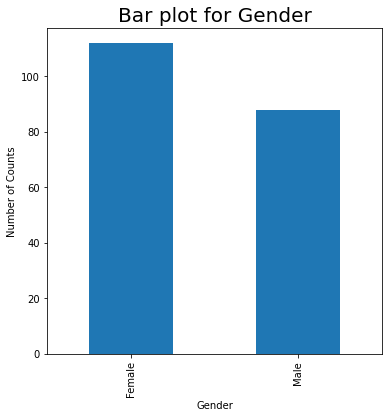

In [204]:
# Examine the distribution of each field: use bar chart for categorical variables and histogram for numeric variables
# Gender
plt.figure(figsize=(6,6))
data.Gender.value_counts().plot(kind='bar');
plt.xlabel("Gender");
plt.ylabel("Number of Counts");
plt.title("Bar plot for Gender",{'fontsize':20});

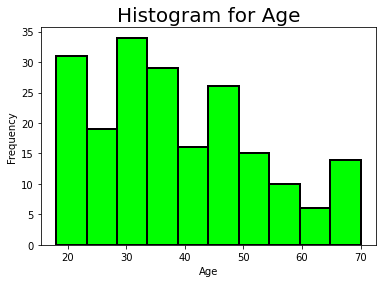

In [205]:
# Age
data['Age'].plot(kind='hist',edgecolor='black',linewidth=2,color='lime')
plt.xlabel("Age");
plt.title("Histogram for Age",{'fontsize':20});

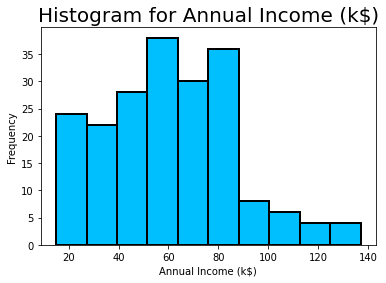

In [206]:
data['Annual Income (k$)'].plot(kind='hist',edgecolor='black',linewidth=2,color='deepskyblue')
plt.xlabel("Annual Income (k$)");
plt.title("Histogram for Annual Income (k$)",{'fontsize':20});

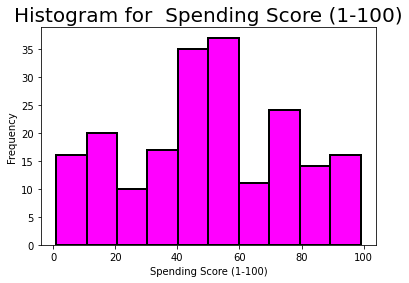

In [207]:
# Spending Score
data['Spending Score (1-100)'].plot(kind='hist',edgecolor='black',linewidth=2,color='magenta')
plt.xlabel("Spending Score (1-100)");
plt.title("Histogram for  Spending Score (1-100)",{'fontsize':20});

In [208]:
#Data Preprocessing

In [209]:
# Drop unnecessary columns
data.drop(['CustomerID', 'Gender'],axis=1,inplace=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [210]:
# Reconcile all dimensions into a standard scale
from sklearn.preprocessing import MinMaxScaler
scalr = MinMaxScaler()
for col in data.columns:
    model = scalr.fit(data[col].values.reshape(-1, 1))
    data[col] = model.transform(data[col].values.reshape(-1, 1))

In [211]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


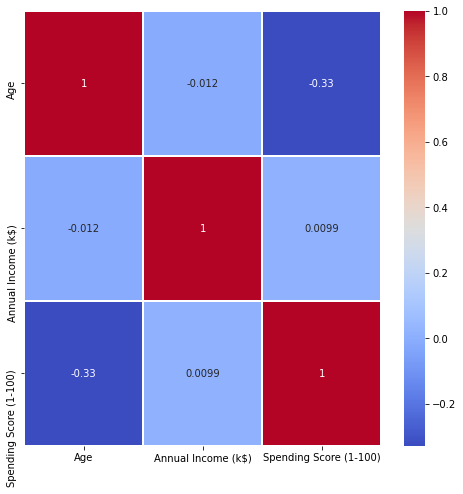

In [212]:
# Correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [ ]:
#EDA

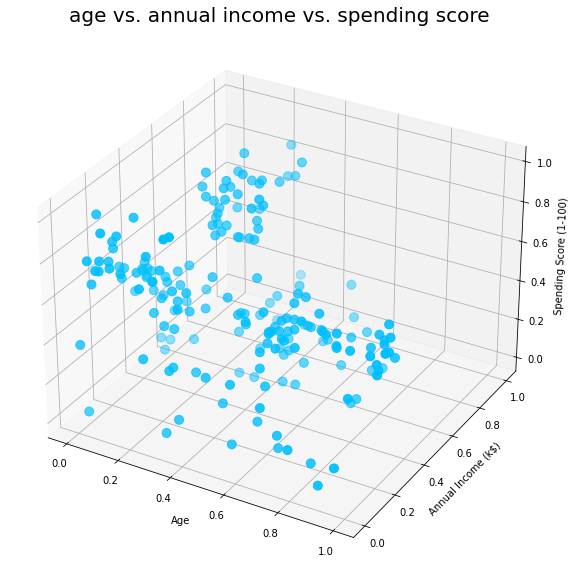

In [213]:
# 3D Scatter Plot:
# age vs. annual income vs. spending score
from mpl_toolkits.mplot3d import axes3d
columns = data.columns
x,y,z = columns
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(data[x],data[y],data[z],s=80,c='deepskyblue',marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z);
plt.title('age vs. annual income vs. spending score',{'fontsize':20});

In [ ]:
# K means Clustering
# This function calls the KMeans() from sklearn library and specify some key parameters:
#   n_clusters: the number of clusters
#   init: it controls initialization techniques and I chose “k-means++” to select initial centroids in a smart way to speed up convergence
#   max_iter: specify the maximum number of iterations allowed for each run
#   algorithm: there are several options to choose from, “auto”, “full” and “elkan” and I chose “elkan” because it is a K Means algorithm variation that uses                triangle inequality to make it more time efficient.
#   random_state: use an integer to determines the random generation of initial centroids

#  The output will generates following attributes and evaluation metrics:
#   cluster_centres_: returns an array of the centroid locations
#   inertia_: sum of squared distances of data points to their closest centroid
#   labels_: the cluster label assigned to each data point
#   silhouette_score: the distance between the data point to other data points in the same cluster compares to the data points in the nearest neighbour                             cluster

In [214]:
#Define a KMeans_Algo function that pass the dataset and the number of clusters as the parameters.
from sklearn.cluster import KMeans
from sklearn import metrics

def Kmeans_Algo(dataset,n):
    km = KMeans(n_clusters=n,init='k-means++',max_iter=300,algorithm='elkan')
    km.fit(dataset)

    centroids = km.cluster_centers_
    centroid_df = pd.DataFrame(centroids,columns=['X','Y','Z'])

    label = km.labels_
    data['label'] = label

    inertia = km.inertia_
    score = metrics.silhouette_score(dataset,label)
    
    return inertia,label,centroid_df,score

In [216]:
# We can create three clusters as follow :
x1 = data[['Age', 'Spending Score (1-100)']].values
x2 = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
x3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

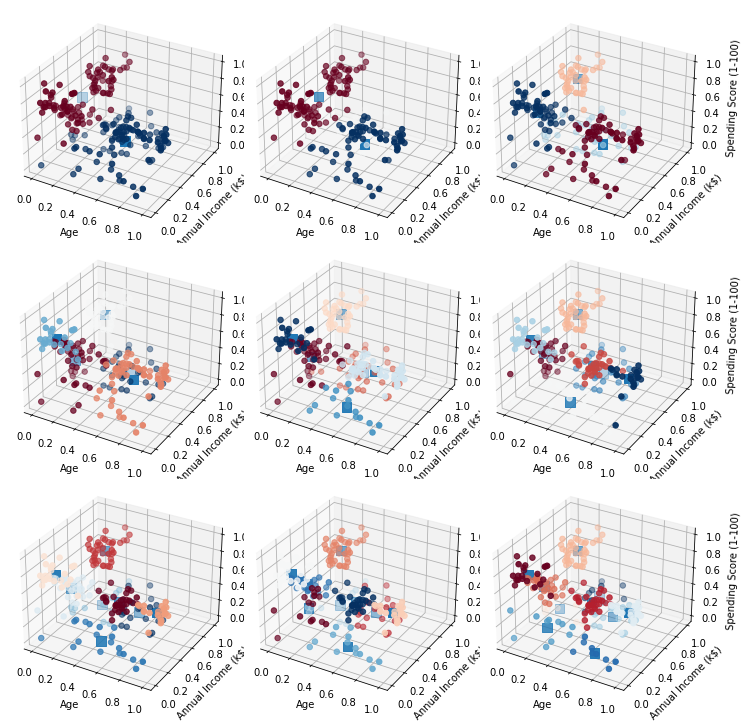

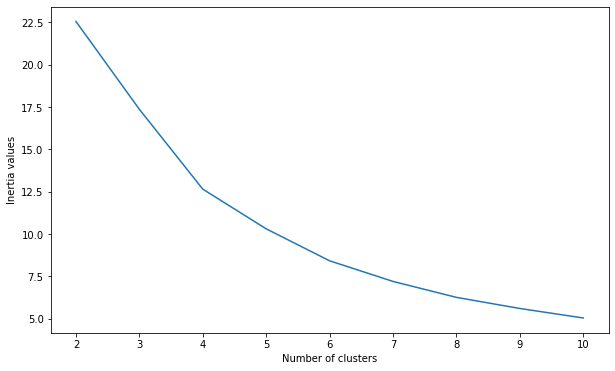

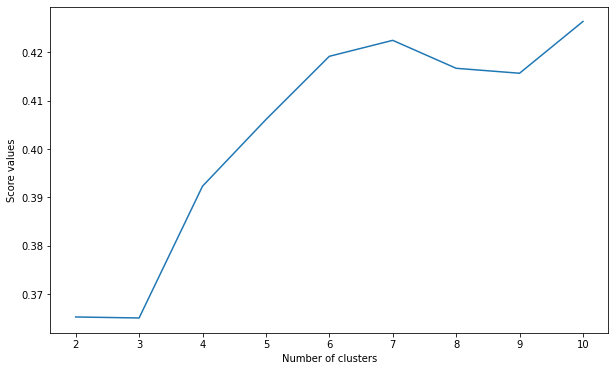

In [222]:
# investigation of how these three fields(Age vs. Annual Income vs. Spending Score) interacts with each other
x3_inertia_values = list()
x3_score_vlues = list()
fig = plt.figure(figsize=(10,10))
for i in range(2,11):
    x3_inertia,x3_label,x3_centroid,x3_score = Kmeans_Algo(x3,i)
    x3_inertia_values.append(x3_inertia)
    x3_score_vlues.append(x3_score)
    centroid_df = pd.DataFrame(x3_centroid,columns=['X','Y','Z'])

    ax = fig.add_subplot(330+i-1,projection='3d')
    ax.scatter(data['Age'],data['Annual Income (k$)'], data['Spending Score (1-100)'],s=30,c=data['label'],cmap='RdBu')
    ax.scatter(centroid_df['X'],centroid_df['Y'],centroid_df['Z'],s=90,marker=',')
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    plt.tight_layout()


plt.figure(11,figsize=(10,6))
plt.plot(np.arange(2,11),x3_inertia_values)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia values")

plt.figure(12,figsize=(10,6))
plt.plot(np.arange(2,11),x3_score_vlues)
plt.xlabel("Number of clusters")
plt.ylabel("Score values");